Firstly we will import the required libraries to work using KMeans

In [2]:
import pandas as pd
import numpy as np

np.random.seed(42)        #semilla
X = np.random.randint(50, 1300, size=15)
Y = np.random.randint(0, 5, size=15)

data = pd.DataFrame({
    'X': X,
    'Y': Y
})

data.to_csv('Clustering.csv', index=False)

print(data)


       X  Y
0   1176  3
1    910  1
2   1180  3
3   1145  4
4   1094  0
5    171  3
6    516  1
7   1288  4
8    380  3
9    137  0
10  1173  0
11   921  2
12   180  2
13   819  1
14   393  3


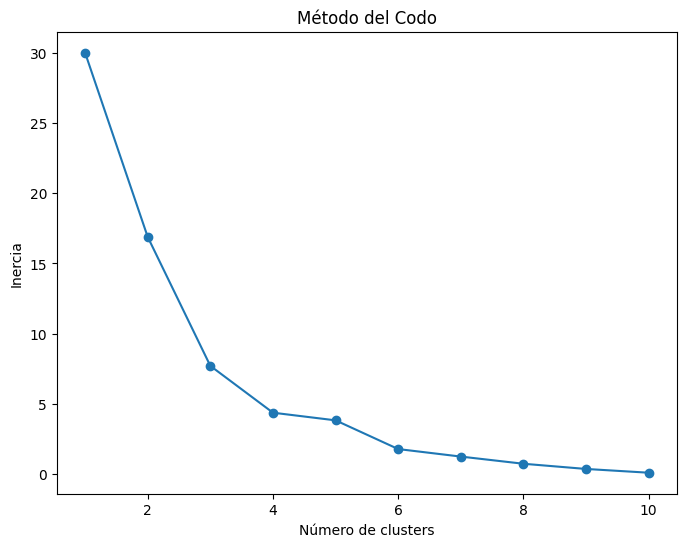

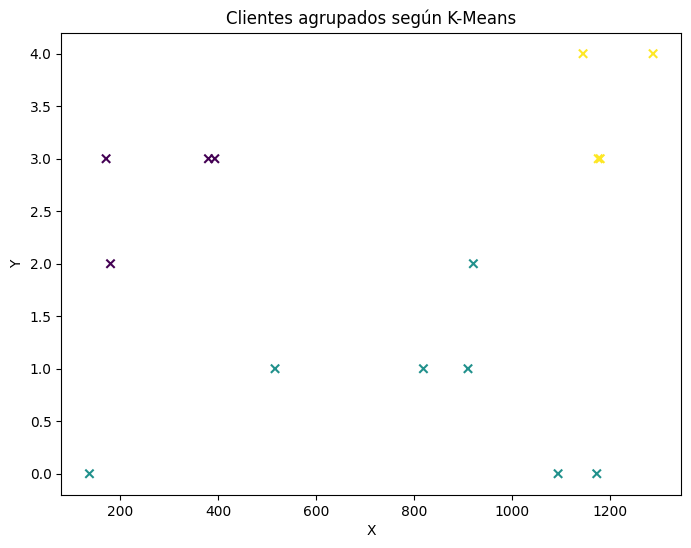

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

data = pd.read_csv("Clustering.csv")
data_selected = data[['X', 'Y']].dropna()

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_selected)

inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Método del Codo')
plt.xlabel('Número de clusters')
plt.ylabel('Inercia')
plt.show()

kmeans = KMeans(n_clusters=3, random_state=42)
data_selected['Cluster'] = kmeans.fit_predict(data_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(data_selected['X'], data_selected['Y'], c=data_selected['Cluster'], cmap='viridis', marker='x')
plt.title('Clientes agrupados según K-Means')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()
